In [1]:
import numpy as np
import pandas as pd
import json
import re
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from datetime import timezone, datetime
import time
from time import strftime, gmtime
from pprint import pprint
import io
import scipy.stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
competences = ['Self-confidence', 'Self-control', 'Openness to change', 'Responsibility', 'Communicability']

In [3]:
tables = []
for comp in competences :
    tables.append(pd.read_csv('./for_testing/' + comp + '.csv', header=0))

In [4]:
tables[0].head()

,1_1_vr,1_1_bio,1_1_time,1_2_vr,1_2_bio,1_2_time,1_3_vr,1_3_bio,1_3_time,2_1_vr,...,10_1_time,10_2_vr,10_2_bio,10_2_time,10_3_vr,10_3_bio,10_3_time,10_4_vr,10_4_bio,10_4_time
0,2.000000,1.333333,94.0,2.000000,1.5,41.0,3.000000,2.000000,90.0,NaN,...,57.0,3.000000,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.000000,2.000000,92.0,2.000000,2.0,34.0,2.666667,1.500000,94.0,NaN,...,69.0,3.000000,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000000,1.166667,106.0,2.000000,2.0,37.0,2.666667,1.500000,84.0,NaN,...,62.0,3.000000,1.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.333333,1.000000,114.0,2.000000,1.0,36.0,2.666667,1.833333,114.0,NaN,...,56.0,2.333333,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000000,1.333333,98.0,2.333333,2.0,41.0,3.000000,2.250000,70.0,NaN,...,68.0,2.666667,1.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN


## Bio Analysis

In [5]:
bio_tables = []
bio_columns = [col for col in tables[0].columns if '_bio' in col]
for table in tables :
    bio_tables.append(table.loc[:, bio_columns])

In [6]:
bio_tables[0].head()

,1_1_bio,1_2_bio,1_3_bio,2_1_bio,2_1.1_bio,2_1.2_bio,2_2_bio,2_2.1_bio,2_2.2_bio,3_1_bio,...,8_3_bio,8_4_bio,8_5_bio,9_1_bio,9_2_bio,9_3_bio,10_1_bio,10_2_bio,10_3_bio,10_4_bio
0,1.333333,1.5,2.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,0.5,...,1.00,0.750000,0.75,1.00,NaN,1.00,0.750000,1.0,NaN,NaN
1,2.000000,2.0,1.500000,NaN,NaN,NaN,1.833333,1.750000,NaN,1.0,...,0.75,0.666667,1.00,0.75,NaN,0.50,0.166667,0.0,NaN,NaN
2,1.166667,2.0,1.500000,NaN,NaN,NaN,1.500000,0.333333,NaN,1.5,...,0.00,1.250000,1.25,0.00,NaN,0.25,0.750000,1.0,NaN,NaN
3,1.000000,1.0,1.833333,NaN,NaN,NaN,1.666667,1.666667,NaN,1.0,...,1.00,1.250000,1.50,0.75,NaN,1.50,1.250000,1.0,NaN,NaN
4,1.333333,2.0,2.250000,NaN,NaN,NaN,1.333333,0.833333,NaN,0.5,...,1.00,1.250000,2.50,1.75,NaN,1.00,0.250000,1.0,NaN,NaN


In [7]:
bio_tables[1].head()

,1_1_bio,1_2_bio,1_3_bio,2_1_bio,2_1.1_bio,2_1.2_bio,2_2_bio,2_2.1_bio,2_2.2_bio,3_1_bio,...,8_3_bio,8_4_bio,8_5_bio,9_1_bio,9_2_bio,9_3_bio,10_1_bio,10_2_bio,10_3_bio,10_4_bio
0,1.333333,1.5,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,1.00,0.750000,0.75,1.00,NaN,1.00,0.750000,1.0,NaN,NaN
1,2.000000,2.0,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.75,0.666667,1.00,0.75,NaN,0.50,0.166667,0.0,NaN,NaN
2,1.166667,2.0,1.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.5,...,0.00,1.250000,1.25,0.00,NaN,0.25,0.750000,1.0,NaN,NaN
3,1.000000,1.0,1.833333,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.00,1.250000,1.50,0.75,NaN,1.50,1.250000,1.0,NaN,NaN
4,1.333333,2.0,2.250000,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,1.00,1.250000,2.50,1.75,NaN,1.00,0.250000,1.0,NaN,NaN


In [8]:
bio_tables[2].head()

,1_1_bio,1_2_bio,1_3_bio,2_1_bio,2_1.1_bio,2_1.2_bio,2_2_bio,2_2.1_bio,2_2.2_bio,3_1_bio,...,8_3_bio,8_4_bio,8_5_bio,9_1_bio,9_2_bio,9_3_bio,10_1_bio,10_2_bio,10_3_bio,10_4_bio
0,1.333333,1.5,2.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,1.00,0.750000,0.75,1.00,NaN,1.00,0.750000,1.0,NaN,NaN
1,2.000000,2.0,1.500000,NaN,NaN,NaN,1.833333,1.750000,NaN,NaN,...,0.75,0.666667,1.00,0.75,NaN,0.50,0.166667,0.0,NaN,NaN
2,1.166667,2.0,1.500000,NaN,NaN,NaN,1.500000,0.333333,NaN,NaN,...,0.00,1.250000,1.25,0.00,NaN,0.25,0.750000,1.0,NaN,NaN
3,1.000000,1.0,1.833333,NaN,NaN,NaN,1.666667,1.666667,NaN,NaN,...,1.00,1.250000,1.50,0.75,NaN,1.50,1.250000,1.0,NaN,NaN
4,1.333333,2.0,2.250000,NaN,NaN,NaN,1.333333,0.833333,NaN,NaN,...,1.00,1.250000,2.50,1.75,NaN,1.00,0.250000,1.0,NaN,NaN


In [9]:
bio_tables[3].head()

,1_1_bio,1_2_bio,1_3_bio,2_1_bio,2_1.1_bio,2_1.2_bio,2_2_bio,2_2.1_bio,2_2.2_bio,3_1_bio,...,8_3_bio,8_4_bio,8_5_bio,9_1_bio,9_2_bio,9_3_bio,10_1_bio,10_2_bio,10_3_bio,10_4_bio
0,1.333333,1.5,2.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,0.5,...,1.00,0.750000,0.75,1.00,NaN,1.00,0.750000,1.0,NaN,NaN
1,2.000000,2.0,1.500000,NaN,NaN,NaN,1.833333,1.750000,NaN,1.0,...,0.75,0.666667,1.00,0.75,NaN,0.50,0.166667,0.0,NaN,NaN
2,1.166667,2.0,1.500000,NaN,NaN,NaN,1.500000,0.333333,NaN,1.5,...,0.00,1.250000,1.25,0.00,NaN,0.25,0.750000,1.0,NaN,NaN
3,1.000000,1.0,1.833333,NaN,NaN,NaN,1.666667,1.666667,NaN,1.0,...,1.00,1.250000,1.50,0.75,NaN,1.50,1.250000,1.0,NaN,NaN
4,1.333333,2.0,2.250000,NaN,NaN,NaN,1.333333,0.833333,NaN,0.5,...,1.00,1.250000,2.50,1.75,NaN,1.00,0.250000,1.0,NaN,NaN


In [10]:
def calc_bio_analysis(tables) :
    bio_impacts = []
    for col in tables[0].columns :
        temp_bio_impacts = []
        for table in tables :
            temp_bio_impacts.append((table[col] < 0.5).sum() / table.shape[0])
        bio_impacts.append(np.max(temp_bio_impacts))
    return pd.Series(bio_impacts, index = tables[0].columns)

In [11]:
calc_bio_analysis(bio_tables).to_json()

'{"1_1_bio":0.2590262172,"1_2_bio":0.2747066167,"1_3_bio":0.182372035,"2_1_bio":0.055980025,"2_1.1_bio":0.0,"2_1.2_bio":0.0053932584,"2_2_bio":0.1188014981,"2_2.1_bio":0.0669163546,"2_2.2_bio":0.0635705368,"3_1_bio":0.1268414482,"3_2_bio":0.102721598,"3_3_bio":0.0789013733,"3_4_bio":0.0,"3_5_bio":0.0,"3_6_bio":0.0671660424,"3_7_bio":0.0845443196,"4_1_bio":0.1484644195,"4_2_bio":0.1155555556,"4_3_bio":0.1368289638,"4_4_bio":0.0,"5_1_bio":0.1089637953,"5_2_bio":0.0292134831,"5_3_bio":0.0342571785,"5_4_bio":0.0677652934,"5_5_bio":0.0,"5_6_bio":0.1340324594,"6_1_bio":0.0702621723,"6_2_bio":0.0022971286,"6_3_bio":0.0810486891,"6_4_bio":0.0493882647,"6_5_bio":0.0051935081,"6_6_bio":0.0,"7_1_bio":0.1161048689,"7_2_bio":0.1105617978,"7_3_bio":0.118701623,"7_4_bio":0.0545318352,"7_5_bio":0.1047191011,"8_1_bio":0.1013233458,"8_2_bio":0.1224968789,"8_3_bio":0.1229962547,"8_4_bio":0.117752809,"8_5_bio":0.1160049938,"9_1_bio":0.1194007491,"9_2_bio":0.0,"9_3_bio":0.1228464419,"10_1_bio":0.1232459426

In [12]:
pd.set_option('display.max_columns', None)

In [93]:
some = pd.DataFrame(calc_bio_analysis(bio_tables)).sort_values(by=0, ascending=True).T
some

,5_5_bio,9_2_bio,6_6_bio,4_4_bio,3_5_bio,3_4_bio,10_4_bio,2_1.1_bio,6_2_bio,6_5_bio,2_1.2_bio,5_2_bio,5_3_bio,6_4_bio,7_4_bio,2_1_bio,2_2.2_bio,2_2.1_bio,3_6_bio,5_4_bio,6_1_bio,10_3_bio,3_3_bio,6_3_bio,3_7_bio,8_1_bio,3_2_bio,7_5_bio,5_1_bio,7_2_bio,4_2_bio,8_5_bio,7_1_bio,8_4_bio,7_3_bio,2_2_bio,9_1_bio,8_2_bio,9_3_bio,8_3_bio,10_1_bio,3_1_bio,5_6_bio,4_3_bio,10_2_bio,4_1_bio,1_3_bio,1_1_bio,1_2_bio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002297,0.005194,0.005393,0.029213,0.034257,0.049388,0.054532,0.05598,0.063571,0.066916,0.067166,0.067765,0.070262,0.076954,0.078901,0.081049,0.084544,0.101323,0.102722,0.104719,0.108964,0.110562,0.115556,0.116005,0.116105,0.117753,0.118702,0.118801,0.119401,0.122497,0.122846,0.122996,0.123246,0.126841,0.134032,0.136829,0.146167,0.148464,0.182372,0.259026,0.274707


<AxesSubplot:>

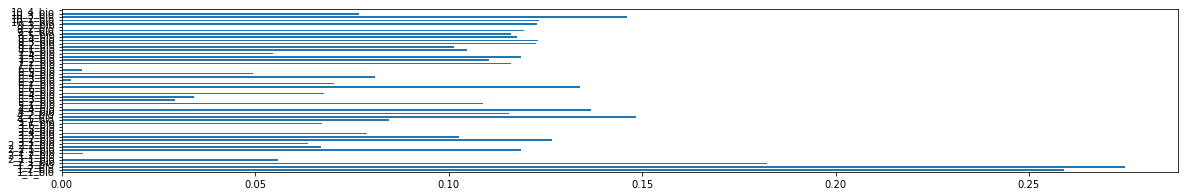

In [65]:
#from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = (20,3)
#figure(figsize=(30, 60))
#some.T.plot.barh(legend=False)

<AxesSubplot:>

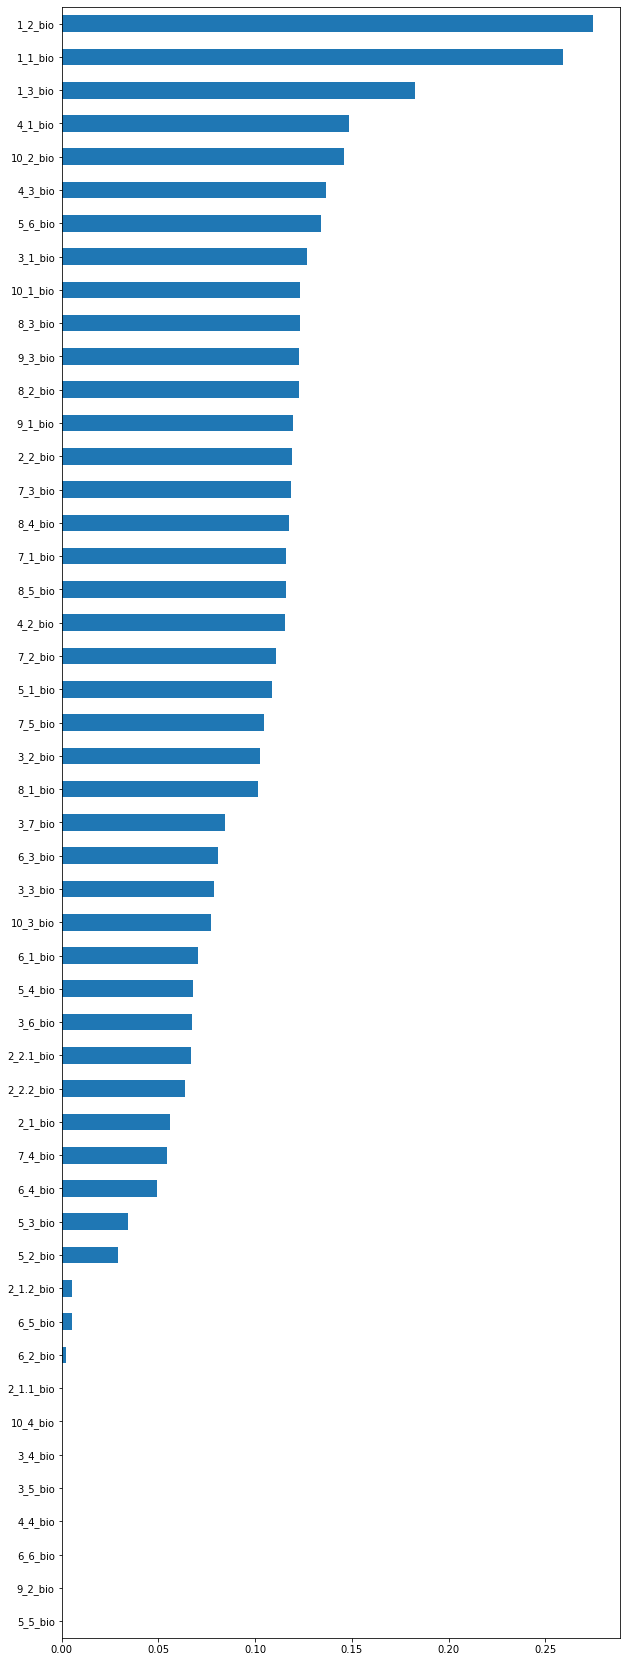

In [94]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,30)
#figure(figsize=(30, 60))
some.T.plot.barh(legend=False)

In [ ]:
pd.DataFrame(list(map(lambda x : x.split('_vr')[0], some.columns))).T

## Shapely analysis

In [31]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vr_tables = []
vr_columns = [col for col in tables[0].columns if '_vr' in col]
for table in tables :
    vr_tables.append(table.loc[:, vr_columns])

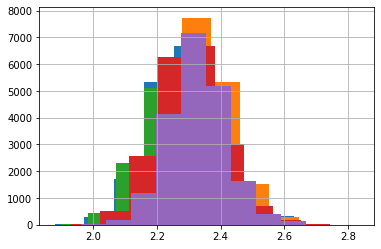

In [33]:
means_vr = []
for table in vr_tables :
    means_vr.append(table.mean(axis=1))
    table.mean(axis=1).hist()
for ix, table in enumerate(vr_tables) :
    table['mean'] = pd.Series(means_vr[ix])

In [34]:
vr_tables[0]

,1_1_vr,1_2_vr,1_3_vr,2_1_vr,2_1.1_vr,2_1.2_vr,2_2_vr,2_2.1_vr,2_2.2_vr,3_1_vr,3_2_vr,3_3_vr,3_4_vr,3_5_vr,3_6_vr,3_7_vr,4_1_vr,4_2_vr,4_3_vr,4_4_vr,5_1_vr,5_2_vr,5_3_vr,5_4_vr,5_5_vr,5_6_vr,6_1_vr,6_2_vr,6_3_vr,6_4_vr,6_5_vr,6_6_vr,7_1_vr,7_2_vr,7_3_vr,7_4_vr,7_5_vr,8_1_vr,8_2_vr,8_3_vr,8_4_vr,8_5_vr,9_1_vr,9_2_vr,9_3_vr,10_1_vr,10_2_vr,10_3_vr,10_4_vr,mean
0,2.000000,2.000000,3.000000,NaN,NaN,NaN,2.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,3.0,3.0,1.0,3.0,3.0,NaN,2.00,3.00,3.00,3.00,NaN,3.00,2.000000,NaN,2.000000,NaN,NaN,NaN,3.000000,1.000000,3.000000,2.000000,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,NaN,1.5,3.000000,3.000000,NaN,NaN,2.560606
1,2.000000,2.000000,2.666667,NaN,NaN,NaN,2.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,2.5,2.5,2.0,3.0,2.0,NaN,2.00,2.25,2.75,3.00,NaN,2.50,2.000000,NaN,1.333333,NaN,NaN,NaN,1.666667,1.000000,1.333333,2.333333,2.000000,2.5,3.0,3.0,2.0,2.5,3.0,NaN,2.0,3.000000,3.000000,NaN,NaN,2.297980
2,2.000000,2.000000,2.666667,NaN,NaN,NaN,3.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.5,2.5,3.0,NaN,2.50,2.50,2.75,2.25,NaN,2.75,1.333333,NaN,2.000000,NaN,NaN,NaN,3.000000,1.666667,2.000000,1.666667,2.666667,3.0,3.0,3.0,3.0,2.5,2.0,NaN,1.0,2.666667,3.000000,NaN,NaN,2.391414
3,2.333333,2.000000,2.666667,NaN,NaN,NaN,1.5,2.0,NaN,1.5,3.0,NaN,NaN,NaN,3.0,3.0,1.0,3.0,2.0,NaN,2.00,2.75,2.75,3.00,NaN,3.00,2.000000,NaN,2.000000,NaN,NaN,NaN,2.666667,1.333333,3.000000,1.666667,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,NaN,1.5,3.000000,2.333333,NaN,NaN,2.439394
4,2.000000,2.333333,3.000000,NaN,NaN,NaN,2.0,2.0,NaN,1.5,3.0,NaN,NaN,NaN,2.5,2.5,1.5,2.5,3.0,NaN,1.75,2.75,2.75,2.75,NaN,2.75,2.000000,NaN,1.666667,NaN,NaN,NaN,2.000000,2.000000,2.666667,1.666667,2.333333,3.0,3.0,2.5,2.5,1.5,3.0,NaN,1.5,2.666667,2.666667,NaN,NaN,2.340909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20020,2.666667,1.666667,2.333333,NaN,NaN,NaN,2.0,2.5,NaN,2.5,NaN,1.0,NaN,NaN,NaN,NaN,3.0,3.0,2.5,NaN,2.00,NaN,NaN,NaN,NaN,2.25,2.333333,2.333333,NaN,NaN,1.666667,NaN,2.333333,2.333333,2.666667,3.000000,2.333333,3.0,3.0,3.0,2.0,1.5,3.0,NaN,1.5,2.000000,1.333333,NaN,NaN,2.301724
20021,3.000000,2.000000,2.000000,NaN,NaN,NaN,1.5,2.5,NaN,2.5,NaN,1.0,NaN,NaN,NaN,NaN,2.5,3.0,3.0,NaN,1.50,NaN,NaN,NaN,NaN,2.75,2.000000,2.666667,NaN,NaN,2.333333,NaN,3.000000,3.000000,2.000000,3.000000,1.666667,2.5,3.0,3.0,2.0,3.0,3.0,NaN,1.5,2.000000,1.333333,NaN,NaN,2.353448
20022,1.000000,2.000000,2.333333,NaN,NaN,NaN,2.0,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0,1.5,3.0,NaN,1.25,NaN,NaN,NaN,NaN,3.00,2.333333,2.666667,NaN,NaN,2.000000,NaN,2.000000,2.666667,3.000000,2.666667,2.333333,3.0,2.5,3.0,2.0,2.0,3.0,NaN,2.0,2.000000,1.000000,NaN,NaN,2.250000
20023,2.333333,2.000000,3.000000,NaN,NaN,NaN,1.5,2.0,NaN,3.0,NaN,1.5,NaN,NaN,NaN,NaN,1.5,3.0,3.0,NaN,1.50,NaN,NaN,NaN,NaN,2.25,2.333333,2.000000,NaN,NaN,1.000000,NaN,3.000000,2.666667,2.333333,2.333333,1.666667,3.0,2.0,2.0,2.0,2.5,3.0,NaN,2.5,2.000000,1.000000,NaN,NaN,2.204023


In [35]:
means = []
for table in vr_tables :
    means.append(table['mean'])
total_mean = pd.concat(means, axis=1, ignore_index=True)
for table in vr_tables :
    table['total_mean'] = total_mean.mean(axis=1)


In [36]:
means = []
stds = []
mins = []
maxs = []
original_means = []
calculated_means = []

for table in vr_tables :
    
    total_mean = table['mean'].mean()
    partial_mean = 0
    mean_pack = []
    std_pack = []
    min_pack = []
    max_pack = []
    #print(table['mean'].mean())
    mean_pack.append(table[table['total_mean'].between(2.40, 3.00)]['mean'].mean())
    std_pack.append(table[table['total_mean'].between(2.40, 3.00)]['mean'].std())
    min_pack.append(table[table['total_mean'].between(2.40, 3.00)]['mean'].min())
    max_pack.append(table[table['total_mean'].between(2.40, 3.00)]['mean'].max())
    
    print(table[table['total_mean'].between(2.40, 3.00)].shape[0])
    partial_mean += mean_pack[-1] * table[table['total_mean'].between(2.40, 3.00)].shape[0]
    
    mean_pack.append(table[table['total_mean'].between(2.20, 2.40)]['mean'].mean())
    std_pack.append(table[table['total_mean'].between(2.20, 2.40)]['mean'].std())
    min_pack.append(table[table['total_mean'].between(2.20, 2.40)]['mean'].min())
    max_pack.append(table[table['total_mean'].between(2.20, 2.40)]['mean'].max())
    
    print(table[table['total_mean'].between(2.20, 2.40)].shape[0])
    partial_mean += mean_pack[-1] * table[table['total_mean'].between(2.20, 2.40)].shape[0]   
    
    mean_pack.append(table[table['total_mean'] < 2.20]['mean'].mean())
    std_pack.append(table[table['total_mean'] < 2.20]['mean'].std())
    min_pack.append(table[table['total_mean'] < 2.20]['mean'].min())
    max_pack.append(table[table['total_mean'] < 2.20]['mean'].max())
    #print(table[table['M061'] == 1]['mean'].mean())
    
    print(table[table['total_mean'] < 2.20].shape[0])
    partial_mean += mean_pack[-1] * table[table['total_mean'] < 2.20].shape[0]   
    
    #print(table[table['M061'] == 2]['mean'].mean())
   
    partial_mean /= table.shape[0]
    #print(table[table['M061'].isin([3, 4])]['mean'].mean())
    print(mean_pack)
    print('Original mean', total_mean) 
    print('Caclulated mean', partial_mean)
    print('Original elements', table.shape[0])
    print('Calculated elements', table[table['total_mean'].between(2.40, 3.00)].shape[0] + table[table['total_mean'].between(2.20, 2.40)].shape[0] + table[table['total_mean'] < 2.20].shape[0])
    means.append(mean_pack)
    stds.append(std_pack)
    mins.append(min_pack)
    maxs.append(max_pack)
    

1803
17057
1166
[2.4633156479356253, 2.287327166588669, 2.137982732168672]
Original mean 2.2944735421553935
Caclulated mean 2.294591034179253
Original elements 20025
Calculated elements 20026
1803
17057
1166
[2.480665228057232, 2.3328633950719477, 2.193687831550119]
Original mean 2.338061504597659
Caclulated mean 2.3381837876412903
Original elements 20025
Calculated elements 20026
1803
17057
1166
[2.424980879209942, 2.270086393069943, 2.1527047873510137]
Original mean 2.2771982568463427
Caclulated mean 2.277311256622263
Original elements 20025
Calculated elements 20026
1803
17057
1166
[2.4422280643876073, 2.2941179156640334, 2.1741745783951574]
Original mean 2.300463428568896
Caclulated mean 2.3005839723336345
Original elements 20025
Calculated elements 20026
1803
17057
1166
[2.4635244562131455, 2.321745892138828, 2.196407834642731]
Original mean 2.327203196858223
Caclulated mean 2.3273291291864027
Original elements 20025
Calculated elements 20026


In [37]:
index = ['Трансформационные руководители', 'Трансакционные руководители', 'Не руководители']
means = list(map(lambda x : pd.Series(x, index=index ), means))
stds = list(map(lambda x : pd.Series(x, index=index ), stds))
mins = list(map(lambda x : pd.Series(x, index=index ), mins))
maxs = list(map(lambda x : pd.Series(x, index=index ), maxs))

comp_dfs = []
for i in range(5) :
    comp_dfs.append(pd.concat([mins[i], maxs[i], means[i], stds[i]], axis=1, keys=['min' , 'max', 'mean', 'std']))

In [38]:
print('Подход № 3 - определение типа руководителя по ГЛОБАЛЬНОМУ среднему арифметическому и статистикам в отчете')
for ix, competence in enumerate(competences) :
    print(competence)
    print(comp_dfs[ix])
    print('\n')
    print('--------------------')

Подход № 3 - определение типа руководителя по ГЛОБАЛЬНОМУ среднему арифметическому и статистикам в отчете
Self-confidence
                                     min       max      mean       std
Трансформационные руководители  2.226562  2.816092  2.463316  0.079408
Трансакционные руководители     1.965517  2.611979  2.287327  0.089646
Не руководители                 1.879310  2.419192  2.137983  0.080928


--------------------
Self-control
                                     min       max      mean       std
Трансформационные руководители  2.193103  2.827564  2.480665  0.074122
Трансакционные руководители     2.033908  2.608974  2.332863  0.077580
Не руководители                 1.911333  2.417857  2.193688  0.074946


--------------------
Openness to change
                                     min       max      mean       std
Трансформационные руководители  2.195513  2.763333  2.424981  0.079007
Трансакционные руководители     1.937500  2.604167  2.270086  0.095802
Не руководители    

In [39]:
for ix, table in enumerate(vr_tables) :
    table['new_feedback'] = 0
    table.loc[table['total_mean'].between(2.40, 3.00), 'new_feedback'] = 3
    table.loc[table['total_mean'].between(2.20, 2.40), 'new_feedback'] = 2
    table.loc[table['total_mean'] < 2.20, 'new_feedback'] = 1

In [41]:
for idx, comp in enumerate(competences) :
    print(comp)
    print(vr_tables[idx]['new_feedback'].value_counts())

Self-confidence
2    17057
3     1802
1     1166
Name: new_feedback, dtype: int64
Self-control
2    17057
3     1802
1     1166
Name: new_feedback, dtype: int64
Openness to change
2    17057
3     1802
1     1166
Name: new_feedback, dtype: int64
Responsibility
2    17057
3     1802
1     1166
Name: new_feedback, dtype: int64
Communicability
2    17057
3     1802
1     1166
Name: new_feedback, dtype: int64


In [55]:
vr_tables[0]['6_1_vr'] = np.ones(vr_tables[0].shape[0])

In [56]:
clfs = []
scalers = []
X_trains = []
y_trains = []
X_tests = []
y_tests = []
for i in range(5) :
    clfs.append(LinearRegression())
    #clfs.append(RandomForestClassifier(random_state=0))
    scalers.append(StandardScaler())
    y = vr_tables[i]['new_feedback']
    #X = tables[i].drop(['new_feedback', 'M061', 'mean', 'id', 'total_mean', 'feedback'], axis=1)
    X = vr_tables[i].drop(['new_feedback', 'mean', 'total_mean'], axis=1)
    X_drop = X.dropna(axis=1)
    X_drop = X.fillna(0)
    #print(X_drop.head())
    
    X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.20, stratify=y, random_state=42)
    scalers[i].fit(X_train)
    X_train = scalers[i].transform(X_train)
    X_test = scalers[i].transform(X_test)
    X_trains.append(X_train)
    y_trains.append(y_train)
    X_tests.append(X_test)
    y_tests.append(y_test)
    print(len(X_trains[i]))
    print(len(X_tests[i]))
    

16020
4005
16020
4005
16020
4005
16020
4005
16020
4005


In [57]:
X_drop['6_1_vr']

0        2.0
1        2.4
2        2.2
3        2.0
4        2.0
        ... 
20020    2.2
20021    2.0
20022    2.0
20023    2.0
20024    2.0
Name: 6_1_vr, Length: 20025, dtype: float64

In [58]:
for i in range(5) :
    #_, X_sample, _, y_sample = train_test_split(X_trains[i], y_trains[i], test_size=0.2, stratify=y_trains[i], random_state=0)
    clfs[i] = LinearRegression()
    clfs[i].fit(X_trains[i], y_trains[i])
    #prediction = clfs[i].predict(X_tests[i])
    #acc_scores[i].append(accuracy_score(y_test, prediction))
    #precision_scores[i].append(precision_score(y_test, prediction, labels = [2, 3], average='micro'))
    #recall_scores[i].append(recall_score(y_test, prediction,  labels = [2, 3], average='micro'))
    #f_scores[i].append(f1_score(y_test, prediction, labels = [2, 3], average='micro'))

In [59]:
# load JS visualization code to notebook
shap.initjs()

In [60]:
explainer = shap.LinearExplainer(clfs[0], X_trains[0])
shap_values = explainer(X_trains[0])

In [61]:
tmp = pd.DataFrame(np.abs(shap_values.values).mean(0)).T
tmp.columns = X_drop.columns
tmp

,1_1_vr,1_2_vr,1_3_vr,2_1_vr,2_1.1_vr,2_1.2_vr,2_2_vr,2_2.1_vr,2_2.2_vr,3_1_vr,3_2_vr,3_3_vr,3_4_vr,3_5_vr,3_6_vr,3_7_vr,4_1_vr,4_2_vr,4_3_vr,4_4_vr,5_1_vr,5_2_vr,5_3_vr,5_4_vr,5_5_vr,5_6_vr,6_1_vr,6_2_vr,6_3_vr,6_4_vr,6_5_vr,6_6_vr,7_1_vr,7_2_vr,7_3_vr,7_4_vr,7_5_vr,8_1_vr,8_2_vr,8_3_vr,8_4_vr,8_5_vr,9_1_vr,9_2_vr,9_3_vr,10_1_vr,10_2_vr,10_3_vr,10_4_vr
0,0.015584,0.012064,0.012541,0.098626,0.0,0.00144,0.013024,0.026257,0.070396,0.011872,0.007912,0.017616,0.024731,0.0,0.009089,0.02368,0.023607,0.008296,0.015521,0.036392,0.015786,0.006375,0.016085,0.011933,0.000115,0.013874,0.0,0.137376,0.014941,0.091577,0.060263,0.0,0.033352,0.05287,0.003984,0.062684,0.044874,0.011282,0.011661,0.011305,0.032786,0.01121,0.00642,0.0,0.009312,0.021531,0.033274,0.019075,0.0


In [48]:
columns = ["6_2_vr", "2_1_vr", "6_4_vr", "2_2.2_vr", "7_4_vr", "7_2_vr", "6_5_vr", "7_5_vr", "7_1_vr", "4_4_vr", "10_2_vr", "8_4_vr", "2_2.1_vr", "3_4_vr", "6_1_vr", "3_7_vr", "10_1_vr", 
           "5_3_vr", "5_4_vr", "5_6_vr", "10_3_vr", "5_1_vr", "3_3_vr", "2_2_vr", "1_1_vr", "4_1_vr", "4_3_vr", "6_3_vr", "1_3_vr", "1_2_vr", "8_3_vr", "3_1_vr", "8_2_vr", "8_1_vr", "8_5_vr", "9_3_vr", "4_2_vr", "9_1_vr", "5_2_vr", "3_2_vr", "3_6_vr", "2_1.2_vr", "7_3_vr", "5_5_vr", "2_1.1_vr", "3_5_vr", "6_6_vr", "9_2_vr", "10_4_vr"]

In [ ]:
8_

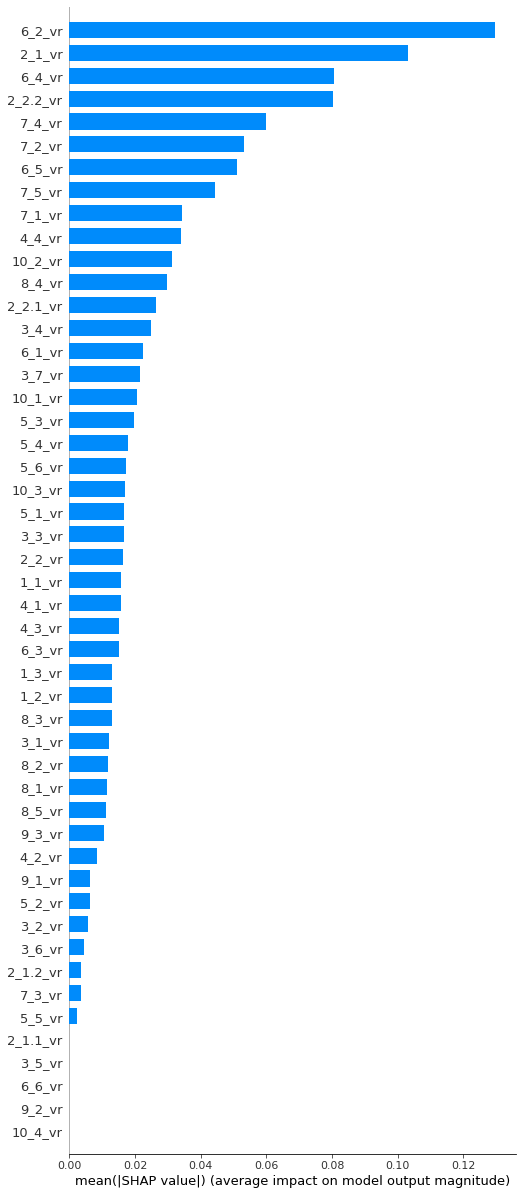

In [47]:
fig = shap.summary_plot(shap_values, X_trains[0], feature_names= X_drop.columns,  plot_type="bar", max_display=50)


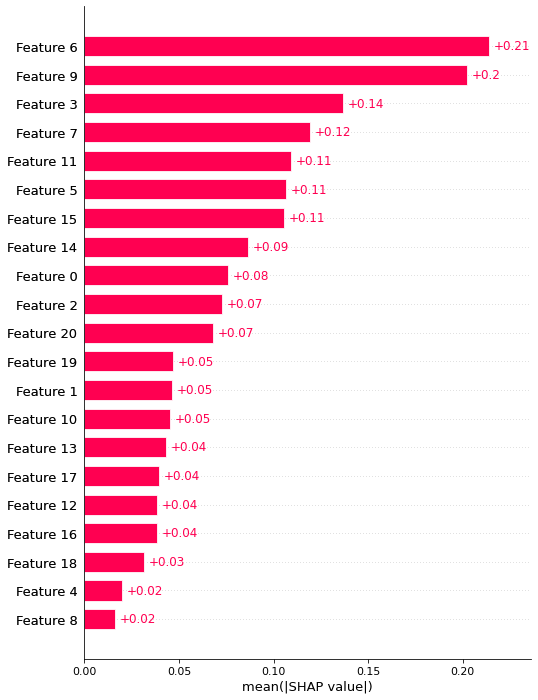

In [96]:
shap.plots.bar(shap_values,  max_display=50)

In [93]:
shap_values

.values =
array([[-0.05611608, -0.02785131, -0.06057671, ..., -0.02753098,
        -0.0213033 , -0.05402762],
       [-0.11531863, -0.05523568, -0.03877672, ..., -0.0625465 ,
        -0.07080439, -0.07069366],
       [ 0.00308646, -0.0415435 , -0.10417669, ..., -0.04503874,
        -0.03780366, -0.03736157],
       ...,
       [ 0.00308646, -0.01415912, -0.12597668, ..., -0.0625465 ,
        -0.03780366, -0.07069366],
       [-0.11531863, -0.06892787, -0.0823767 , ..., -0.02753098,
        -0.0213033 , -0.03736157],
       [-0.05611608, -0.0415435 , -0.0823767 , ..., -0.02753098,
        -0.0213033 , -0.03736157]])

.base_values =
array([3.69195377, 3.69195377, 3.69195377, ..., 3.69195377, 3.69195377,
       3.69195377])

.data =
array([[ 0.52760904,  1.01066195,  0.41597693, ...,  0.21734085,
         1.17108676,  0.47577904],
       [-1.10805556, -0.47337145,  1.16956173, ..., -1.97109432,
        -1.09425555, -0.09989922],
       [ 2.16327365,  0.26864525, -1.09119267, ..., -0.87687